### Here is the Cancer patients data, which I used from Kaggle. I prepared the data, analysed the data and compared different classification models, to get the best accuracy.
### Out of all the classifiers, Radius Neighbors Classifier, Decision Tree Classifier and Random Forest Classifier gave the best accuracy. 

### Importing Libraries...

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading Data...

In [3]:
cancerData = pd.read_excel('/kaggle/input/cancer-patients-data/cancer patient data sets.xlsx')
cancerData.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


### EDA

In [4]:
cancerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [5]:
cancerData.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
cancerData.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
cancerData['Level'].value_counts()

High      365
Medium    332
Low       303
Name: Level, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cancerData['Level']=le.fit_transform(cancerData['Level'])

In [9]:
cancerData.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,0
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,0
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,0


In [10]:
le.classes_

array(['High', 'Low', 'Medium'], dtype=object)

In [11]:
cancerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

<AxesSubplot:>

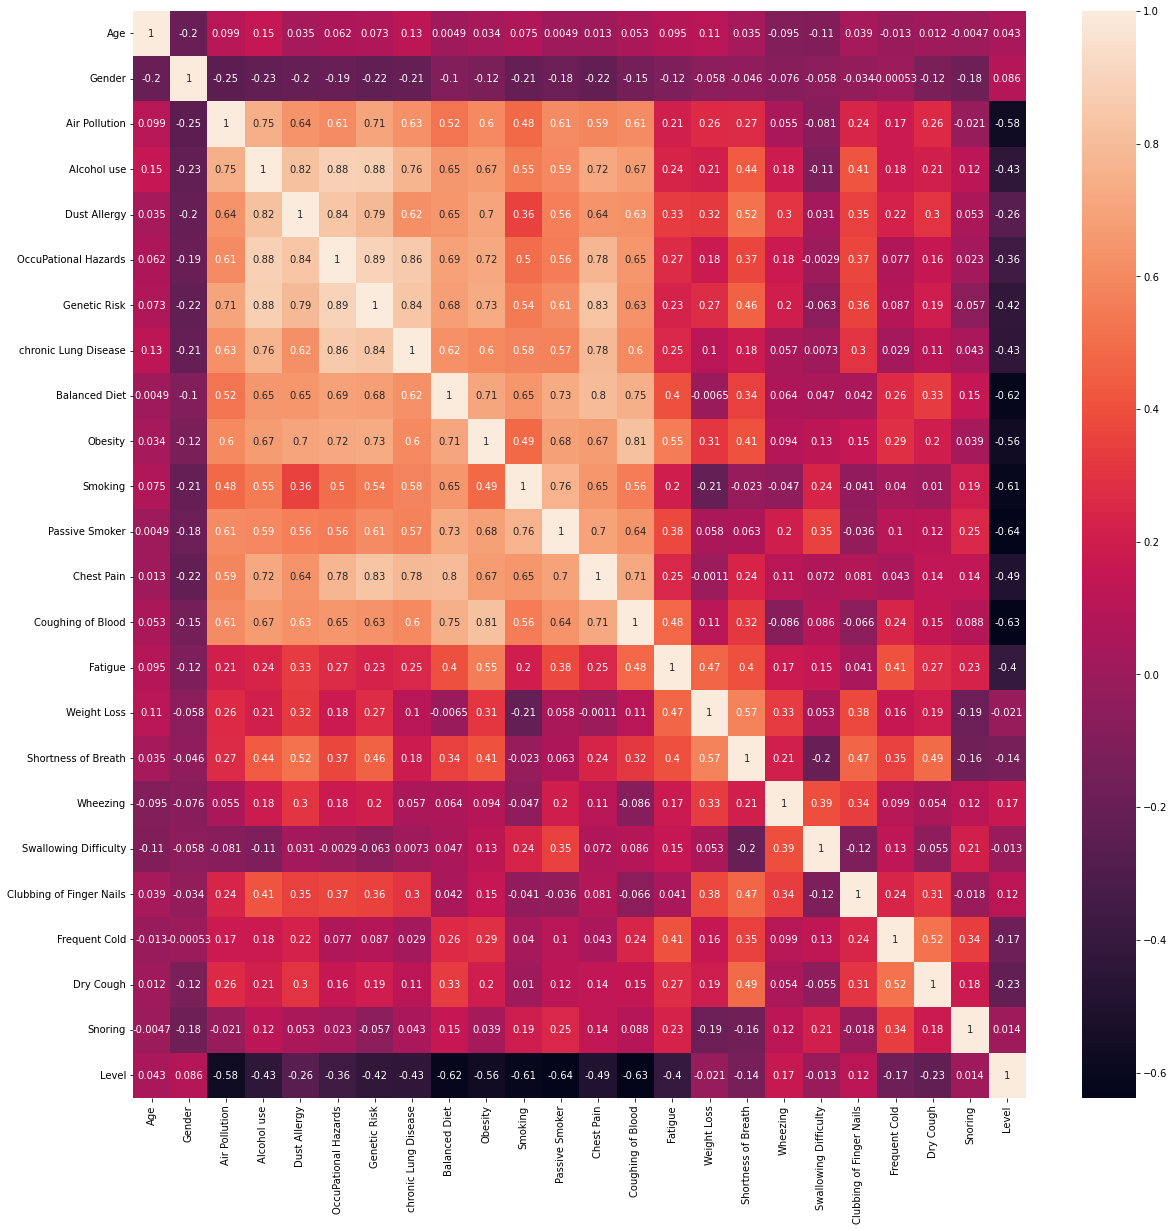

In [12]:
cancerDataCorr = cancerData.corr()
fig,ax = plt.subplots(figsize = (20,20))
sns.heatmap(cancerDataCorr,annot = True)

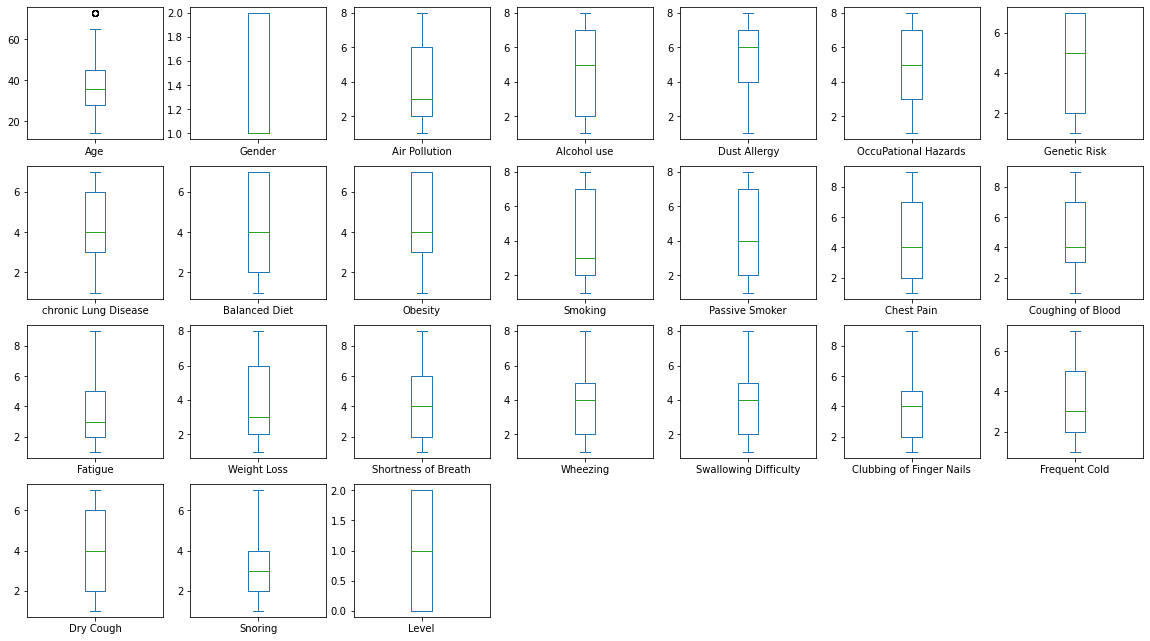

In [13]:
col_list = cancerData.columns
cancerData[col_list].plot(kind = 'box',subplots = 'True',layout = (7,7),figsize = (20,20))
plt.show()

In [14]:
Age = cancerData.Age
Q1 = np.quantile(Age,0.25)
Q3 = np.quantile(Age,0.75)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
Outliers = []
for i in Age:
    if (i<lower or i>upper):
        Outliers.append(i)
        
print(Outliers)        

[73, 73, 73, 73, 73, 73, 73, 73, 73, 73]


In [15]:
for i in Outliers:
    cancerData.drop(cancerData[(cancerData['Age']==i)].index,inplace = True) 

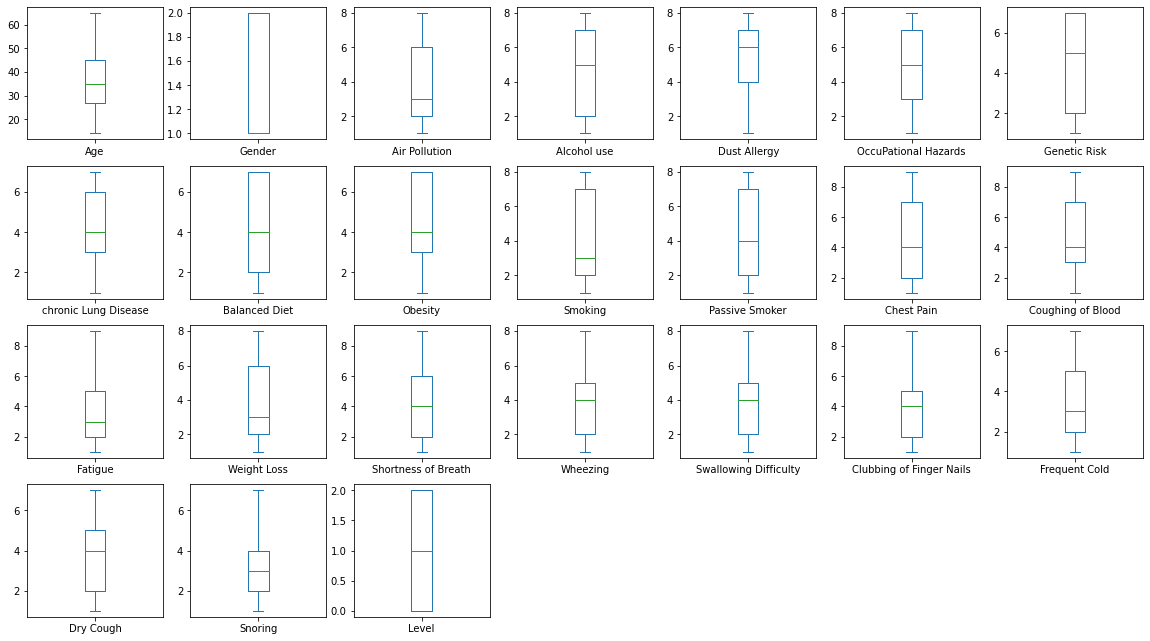

In [16]:
col_list = cancerData.columns
cancerData[col_list].plot(kind = 'box',subplots = 'True',layout = (7,7),figsize = (20,20))
plt.show()

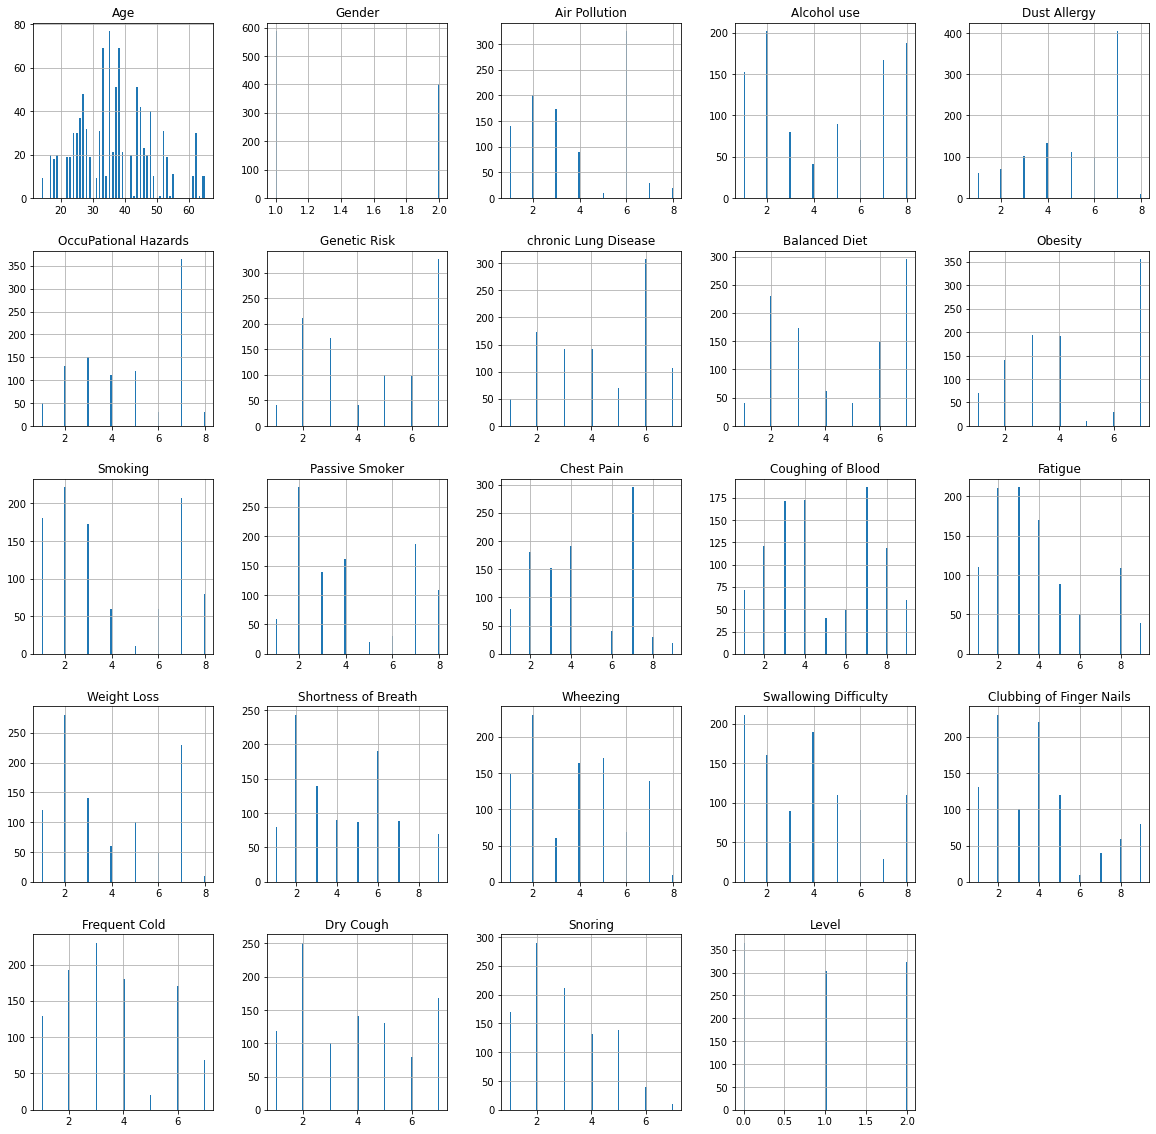

In [17]:
cancerData.hist(bins = 100,figsize = (20,20))
plt.show()

In [18]:
cancerDataCorr['Level'].sort_values(ascending = False)

Level                       1.000000
Wheezing                    0.167773
Clubbing of Finger Nails    0.116746
Gender                      0.086222
Age                         0.042631
Snoring                     0.014280
Swallowing Difficulty      -0.012880
Weight Loss                -0.020537
Shortness of Breath        -0.140178
Frequent Cold              -0.171678
Dry Cough                  -0.228720
Dust Allergy               -0.264926
OccuPational Hazards       -0.363748
Fatigue                    -0.403276
Genetic Risk               -0.423382
chronic Lung Disease       -0.432405
Alcohol use                -0.434071
Chest Pain                 -0.494704
Obesity                    -0.561961
Air Pollution              -0.577269
Smoking                    -0.611087
Balanced Diet              -0.618781
Coughing of Blood          -0.631118
Passive Smoker             -0.638409
Name: Level, dtype: float64

In [19]:
X = cancerData.drop(['Level','Patient Id'],axis=1)
y = cancerData[['Level']]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X,y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(solver='liblinear')

In [22]:
importances = pd.DataFrame(data={'Attribute': X.columns,'Importance': model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

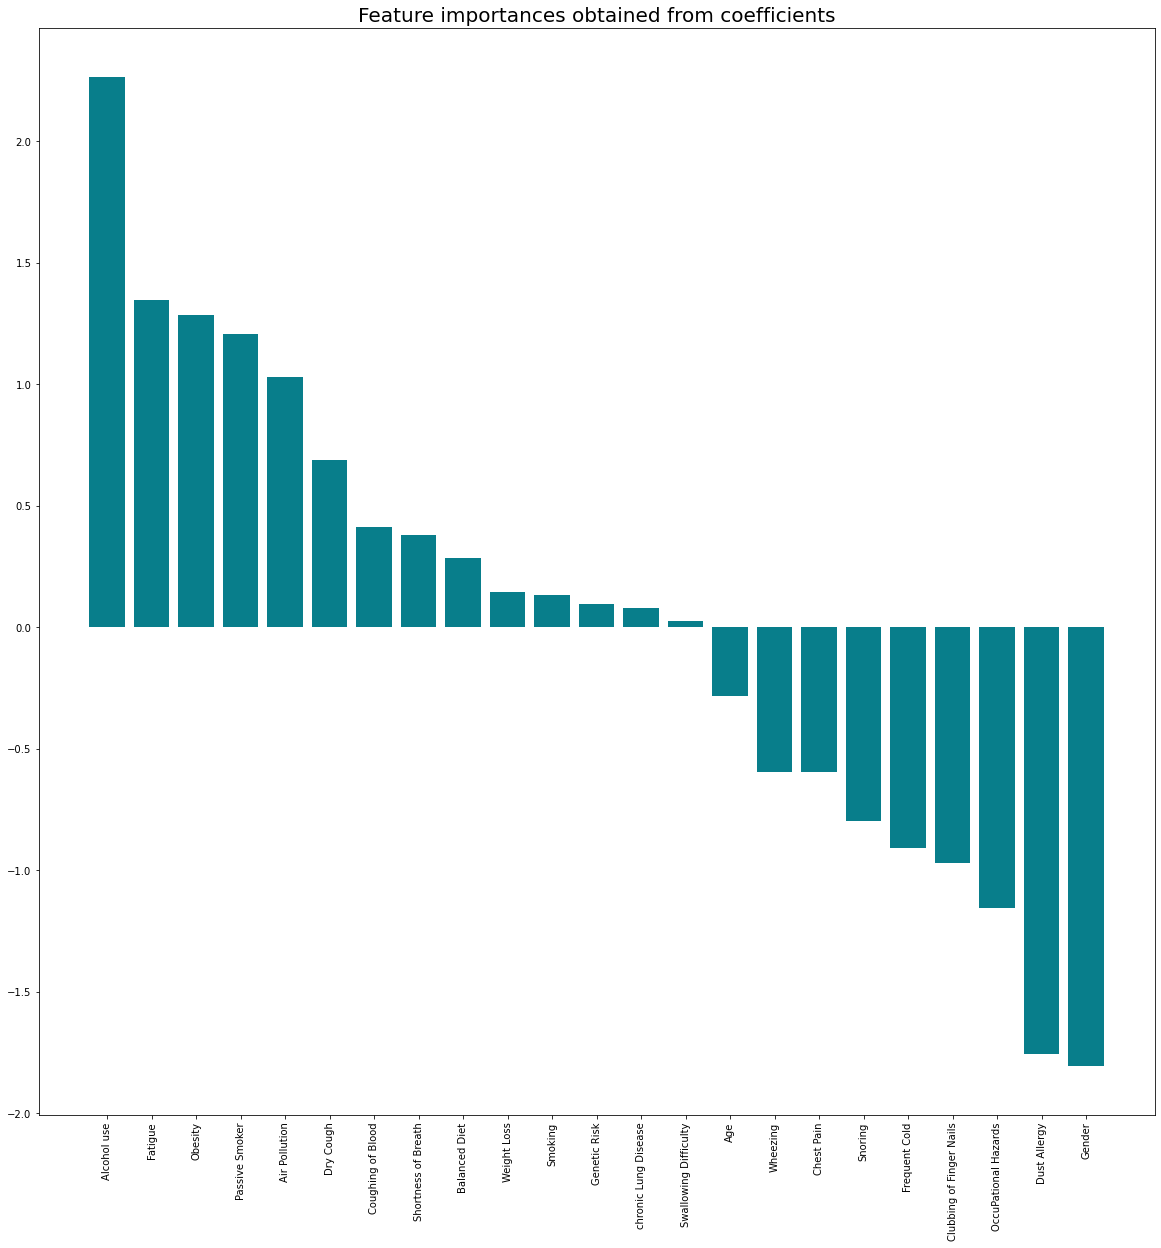

In [23]:
fig,ax = plt.subplots(figsize=(20,20))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
X.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring'],
      dtype='object')

In [25]:
importantFeatures = ['Alcohol use','Fatigue','Obesity','Passive Smoker',
                     'Air Pollution','Dry Cough','Coughing of Blood','Shortness of Breath']

In [26]:
cancerDataNew = cancerData[importantFeatures]
cancerDataNew.head()

,Alcohol use,Fatigue,Obesity,Passive Smoker,Air Pollution,Dry Cough,Coughing of Blood,Shortness of Breath
0,4,3,4,2,2,3,4,2
1,1,1,2,4,3,7,3,7
2,5,8,7,3,4,7,8,9
3,7,4,7,7,7,7,8,3
4,8,3,7,7,6,2,9,4


In [27]:
x_train,x_test,y_train,y_test = train_test_split(cancerDataNew,y,test_size = 0.2)

### **Logistic Regression**

In [28]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(x_train,y_train)
y_pred = LogReg.predict(x_test)
y_pred_prob = LogReg.predict_proba(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
from sklearn.metrics import (accuracy_score,classification_report,
confusion_matrix,precision_score,f1_score,recall_score,roc_auc_score,auc)

In [30]:
LogRegAccuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy_score(y_test,y_pred),"\n")
print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Precision Score : ",precision_score(y_test,y_pred,average = None),"\n")
print("Recall Score : ",recall_score(y_test,y_pred,average = None),"\n")
print("F1 Score : ",f1_score(y_test,y_pred,average = None),"\n")

Accuracy :  0.8333333333333334 

Classification Report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        77
           1       0.74      0.78      0.76        58
           2       0.81      0.68      0.74        63

    accuracy                           0.83       198
   macro avg       0.82      0.82      0.82       198
weighted avg       0.83      0.83      0.83       198

Confusion Matrix : 
 [[77  0  0]
 [ 3 45 10]
 [ 4 16 43]] 

Precision Score :  [0.91666667 0.73770492 0.81132075] 

Recall Score :  [1.         0.77586207 0.68253968] 

F1 Score :  [0.95652174 0.75630252 0.74137931] 



### **Linear Discriminant Analysis**

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train,y_train)
y_pred = LDA.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
LDA_Accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy_score(y_test,y_pred),"\n")
print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Precision Score : ",precision_score(y_test,y_pred,average = None),"\n")
print("Recall Score : ",recall_score(y_test,y_pred,average = None),"\n")
print("F1 Score : ",f1_score(y_test,y_pred,average = None),"\n")

Accuracy :  0.8787878787878788 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        77
           1       0.79      0.90      0.84        58
           2       0.88      0.71      0.79        63

    accuracy                           0.88       198
   macro avg       0.87      0.87      0.87       198
weighted avg       0.88      0.88      0.88       198

Confusion Matrix : 
 [[77  0  0]
 [ 0 52  6]
 [ 4 14 45]] 

Precision Score :  [0.95061728 0.78787879 0.88235294] 

Recall Score :  [1.         0.89655172 0.71428571] 

F1 Score :  [0.97468354 0.83870968 0.78947368] 



### **Quadratic Discriminant Analysis**

In [33]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(x_train,y_train)
y_pred = QDA.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
QDA_Accuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy_score(y_test,y_pred),"\n")
print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Precision Score : ",precision_score(y_test,y_pred,average = None),"\n")
print("Recall Score : ",recall_score(y_test,y_pred,average = None),"\n")
print("F1 Score : ",f1_score(y_test,y_pred,average = None),"\n")

Accuracy :  0.9696969696969697 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       0.96      0.93      0.95        58
           2       0.94      0.97      0.95        63

    accuracy                           0.97       198
   macro avg       0.97      0.97      0.97       198
weighted avg       0.97      0.97      0.97       198

Confusion Matrix : 
 [[77  0  0]
 [ 0 54  4]
 [ 0  2 61]] 

Precision Score :  [1.         0.96428571 0.93846154] 

Recall Score :  [1.         0.93103448 0.96825397] 

F1 Score :  [1.         0.94736842 0.953125  ] 



### **SGD Classifier**

In [35]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD.fit(x_train,y_train)
y_pred = SGD.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
SGDAccuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy_score(y_test,y_pred),"\n")
print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Precision Score : ",precision_score(y_test,y_pred,average = None),"\n")
print("Recall Score : ",recall_score(y_test,y_pred,average = None),"\n")
print("F1 Score : ",f1_score(y_test,y_pred,average = None),"\n")

Accuracy :  0.9191919191919192 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        77
           1       0.96      0.83      0.89        58
           2       0.85      0.90      0.88        63

    accuracy                           0.92       198
   macro avg       0.92      0.91      0.91       198
weighted avg       0.92      0.92      0.92       198

Confusion Matrix : 
 [[77  0  0]
 [ 0 48 10]
 [ 4  2 57]] 

Precision Score :  [0.95061728 0.96       0.85074627] 

Recall Score :  [1.         0.82758621 0.9047619 ] 

F1 Score :  [0.97468354 0.88888889 0.87692308] 



### **Support Vector Classifier**

In [37]:
from sklearn.svm import LinearSVC
SVC = LinearSVC()
SVC.fit(x_train,y_train)
y_pred = SVC.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [38]:
SVCAccuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy_score(y_test,y_pred),"\n")
print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Precision Score : ",precision_score(y_test,y_pred,average = None),"\n")
print("Recall Score : ",recall_score(y_test,y_pred,average = None),"\n")
print("F1 Score : ",f1_score(y_test,y_pred,average = None),"\n")

Accuracy :  0.8838383838383839 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        77
           1       0.77      0.95      0.85        58
           2       0.93      0.68      0.79        63

    accuracy                           0.88       198
   macro avg       0.89      0.88      0.87       198
weighted avg       0.89      0.88      0.88       198

Confusion Matrix : 
 [[77  0  0]
 [ 0 55  3]
 [ 4 16 43]] 

Precision Score :  [0.95061728 0.77464789 0.93478261] 

Recall Score :  [1.         0.94827586 0.68253968] 

F1 Score :  [0.97468354 0.85271318 0.78899083] 



### **Radius Neighbors Classifier**

In [39]:
from sklearn.neighbors import RadiusNeighborsClassifier
RNC = RadiusNeighborsClassifier()
RNC.fit(x_train,y_train)
y_pred = RNC.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:501: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._fit(X, y)


In [40]:
RNCAccuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy_score(y_test,y_pred),"\n")
print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Precision Score : ",precision_score(y_test,y_pred,average = None),"\n")
print("Recall Score : ",recall_score(y_test,y_pred,average = None),"\n")
print("F1 Score : ",f1_score(y_test,y_pred,average = None),"\n")

Accuracy :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        63

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198

Confusion Matrix : 
 [[77  0  0]
 [ 0 58  0]
 [ 0  0 63]] 

Precision Score :  [1. 1. 1.] 

Recall Score :  [1. 1. 1.] 

F1 Score :  [1. 1. 1.] 



### **Naive Bayes**

In [41]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train)
y_pred = NB.predict(x_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [42]:
NBAccuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy_score(y_test,y_pred),"\n")
print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Precision Score : ",precision_score(y_test,y_pred,average = None),"\n")
print("Recall Score : ",recall_score(y_test,y_pred,average = None),"\n")
print("F1 Score : ",f1_score(y_test,y_pred,average = None),"\n")

Accuracy :  0.8888888888888888 

Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        77
           1       0.81      0.93      0.86        58
           2       0.90      0.73      0.81        63

    accuracy                           0.89       198
   macro avg       0.89      0.88      0.88       198
weighted avg       0.89      0.89      0.89       198

Confusion Matrix : 
 [[76  0  1]
 [ 0 54  4]
 [ 4 13 46]] 

Precision Score :  [0.95       0.80597015 0.90196078] 

Recall Score :  [0.98701299 0.93103448 0.73015873] 

F1 Score :  [0.96815287 0.864      0.80701754] 



### **Decision Tree**

In [43]:
from sklearn.tree import DecisionTreeClassifier
DC = DecisionTreeClassifier()
DC.fit(x_train,y_train)
y_pred = DC.predict(x_test)

In [44]:
DCAccuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy_score(y_test,y_pred),"\n")
print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Precision Score : ",precision_score(y_test,y_pred,average = None),"\n")
print("Recall Score : ",recall_score(y_test,y_pred,average = None),"\n")
print("F1 Score : ",f1_score(y_test,y_pred,average = None),"\n")

Accuracy :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        63

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198

Confusion Matrix : 
 [[77  0  0]
 [ 0 58  0]
 [ 0  0 63]] 

Precision Score :  [1. 1. 1.] 

Recall Score :  [1. 1. 1.] 

F1 Score :  [1. 1. 1.] 



### **Random Forest**

In [45]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
RFAccuracy = accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy_score(y_test,y_pred),"\n")
print("Classification Report : \n",classification_report(y_test,y_pred))
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred),"\n")
print("Precision Score : ",precision_score(y_test,y_pred,average = None),"\n")
print("Recall Score : ",recall_score(y_test,y_pred,average = None),"\n")
print("F1 Score : ",f1_score(y_test,y_pred,average = None),"\n")

Accuracy :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        58
           2       1.00      1.00      1.00        63

    accuracy                           1.00       198
   macro avg       1.00      1.00      1.00       198
weighted avg       1.00      1.00      1.00       198

Confusion Matrix : 
 [[77  0  0]
 [ 0 58  0]
 [ 0  0 63]] 

Precision Score :  [1. 1. 1.] 

Recall Score :  [1. 1. 1.] 

F1 Score :  [1. 1. 1.] 



### Comparision

In [47]:
print("All classifiers with their accuracy score : \n")
Classifiers = pd.DataFrame(columns = ['Classifiers','Accuracy'])
Classifiers['Classifiers'] = np.array(['Logistic Regression','Linear Discriminant Analysis',
                                       'Quadratic Discriminant Analysis','SGD Classifier',
                                      'Support Vector Classifier','Radius Neighbors Classifier',
                                      'Naive Bayes','Decision Tree Classifier',
                                      'Random Forest Classifier'])
Classifiers['Accuracy'] = np.array([LogRegAccuracy,LDA_Accuracy,QDA_Accuracy,
                                   SGDAccuracy,SVCAccuracy,RNCAccuracy,
                                   NBAccuracy,DCAccuracy,RFAccuracy])
Classifiers.sort_values(by = ['Accuracy'],ascending = False)

All classifiers with their accuracy score : 



,Classifiers,Accuracy
5,Radius Neighbors Classifier,1.000000
7,Decision Tree Classifier,1.000000
8,Random Forest Classifier,1.000000
2,Quadratic Discriminant Analysis,0.969697
3,SGD Classifier,0.919192
6,Naive Bayes,0.888889
4,Support Vector Classifier,0.883838
1,Linear Discriminant Analysis,0.878788
0,Logistic Regression,0.833333
